# PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('pca.csv')
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,93,34.0,66.0,140.0,56.0,7,130.0,51.0,18.0,120,151.0,251.0,114.0,62.0,5.0,29.0,201.0,207,car
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car


In [3]:
df.tail()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
840,93,34.0,66.0,140.0,56.0,7,130.0,51.0,18.0,120,151.0,251.0,114.0,62.0,5.0,29.0,201.0,207,car
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [4]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  845 non-null    int64  
 1   circularity                  840 non-null    float64
 2   distance_circularity         841 non-null    float64
 3   radius_ratio                 839 non-null    float64
 4   pr.axis_aspect_ratio         843 non-null    float64
 5   max.length_aspect_ratio      845 non-null    int64  
 6   scatter_ratio                844 non-null    float64
 7   elongatedness                844 non-null    float64
 8   pr.axis_rectangularity       842 non-null    float64
 9   max.length_rectangularity    845 non-null    int64  
 10  scaled_variance              842 non-null    float64
 11  scaled_variance.1            843 non-null    float64
 12  scaled_radius_of_gyration    843 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
df.shape

(845, 19)

In [7]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,845.000000,840.000000,841.000000,839.000000,843.000000,845.000000,844.000000,844.000000,842.000000,845.000000,842.000000,843.000000,843.000000,841.000000,839.000000,844.000000,844.000000,845.000000
mean,93.688757,44.839286,82.129608,168.942789,61.686833,8.571598,168.959716,40.915877,20.586698,148.022485,188.688836,439.763938,174.761566,72.447087,6.370679,12.595972,188.922986,195.639053
std,8.233928,6.148277,15.777881,33.502667,7.892788,4.602302,33.191787,7.803566,2.591528,14.507907,31.384851,176.597634,32.569295,7.490621,4.920092,8.939445,6.158638,7.440675
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.500000,149.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


# Data PreProcessing

In [8]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
df = df.fillna(df.mode().iloc[0])

In [13]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# EDA

In [14]:
df.groupby('class').count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
car,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
van,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198


In [15]:
df['class'].value_counts()

class
car    429
bus    218
van    198
Name: count, dtype: int64

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_14760/342490104.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['compactness'])


Text(0.5, 1.0, 'Distribution Plot')

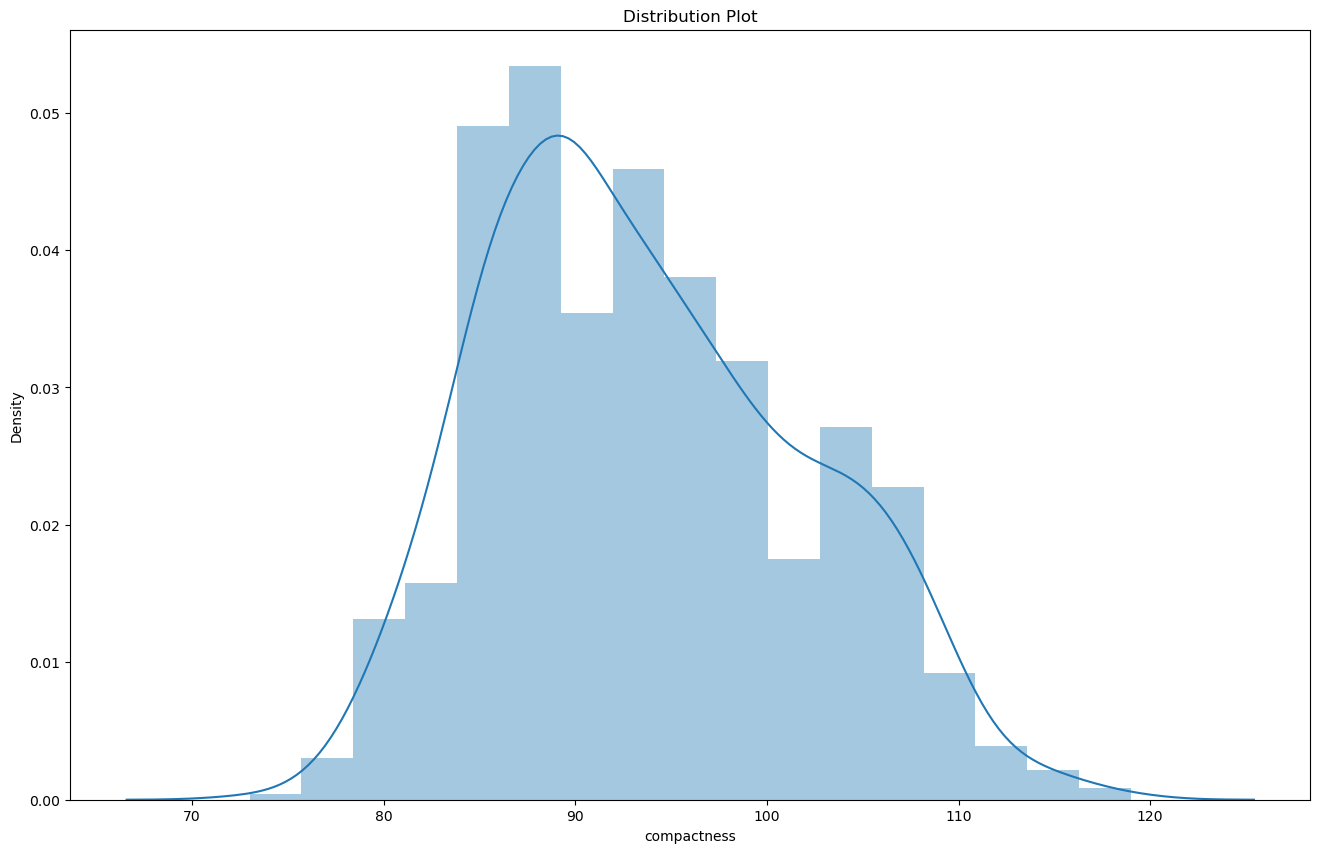

In [18]:
plt.figure(figsize=(16,10))
sns.distplot(df['compactness'])
plt.title('Distribution Plot')

Text(0.5, 1.0, 'Box Plot')

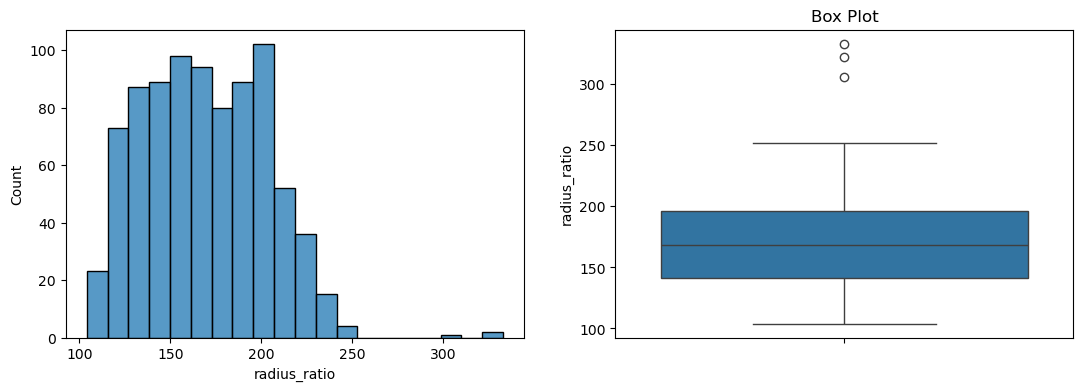

In [35]:
fig,(s1,s2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(13,4)
sns.histplot(df['radius_ratio'],ax=s1)

sns.boxplot(df['radius_ratio'],ax=s2)
s2.set_title('Box Plot')

In [22]:
q1=np.quantile(df['radius_ratio'],0.25)
q2=np.quantile(df['radius_ratio'],0.50)
q3=np.quantile(df['radius_ratio'],0.75)
IQR=q3-q1

In [24]:
print('Quartile 1: ',q1)
print('Quartile 2: ',q2)
print('Quartile 3: ',q3)
print('Inter Quartile Range :',IQR)

Quartile 1:  141.0
Quartile 2:  168.0
Quartile 3:  196.0
Inter Quartile Range : 55.0


In [25]:
print('radius_ratio above ',df['radius_ratio'].quantile(0.75)+(1.5*IQR),'are outliers')

radius_ratio above  278.5 are outliers


In [30]:
print('No of Outliers :' ,df[df['radius_ratio']>276]['radius_ratio'].shape[0])

No of Outliers : 3


Text(0.5, 1.0, 'BoxPlot')

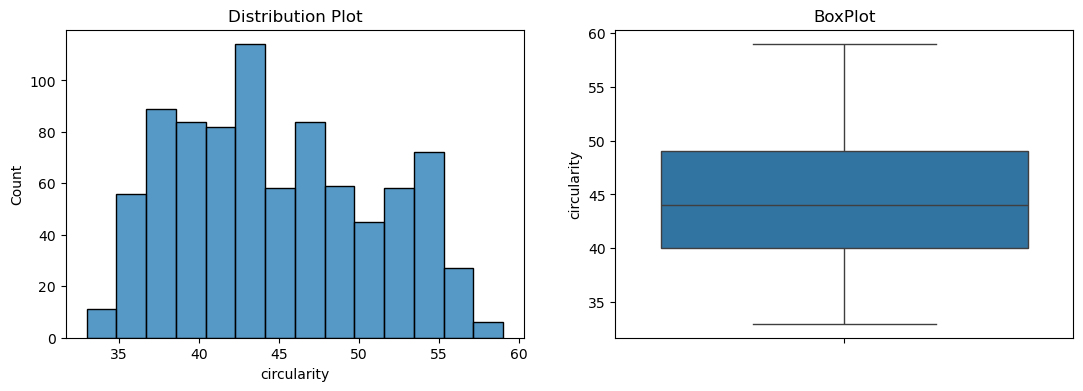

In [34]:
fig,(s1,s2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(13,4)
sns.histplot(df['circularity'],ax=s1)
s1.set_title('Distribution Plot')

sns.boxplot(df['circularity'],ax=s2)
s2.set_title('BoxPlot')

Text(0.5, 1.0, 'Box Plot')

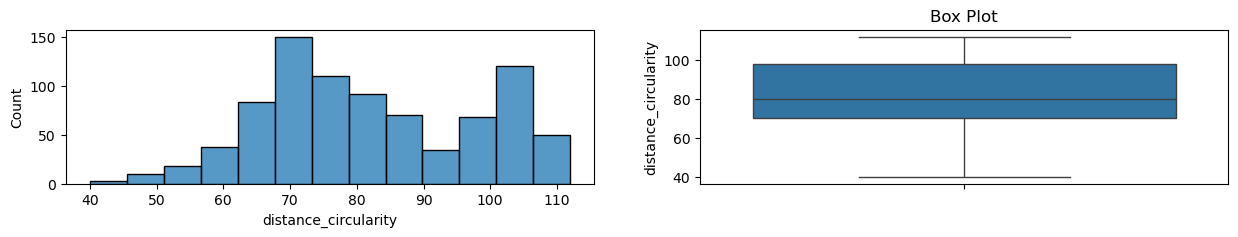

In [36]:
fig,(s1,s2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,2)
sns.histplot(df['distance_circularity'],ax=s1)

sns.boxplot(df['distance_circularity'],ax=s2)
s2.set_title('Box Plot')

<Axes: xlabel='count', ylabel='class'>

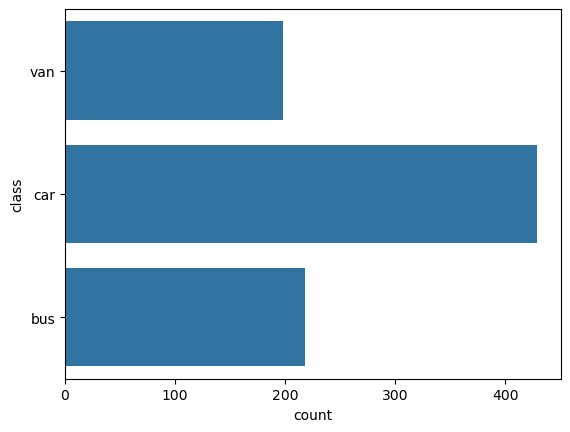

In [37]:
sns.countplot(df['class'])

# PCA

In [38]:
x_train=df.drop('class',axis=1)
x_target=df['class']

In [39]:
x_train.shape

(845, 18)

In [40]:
x_target.shape

(845,)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
scaler.fit(x_train)

StandardScaler()

In [44]:
from scipy.stats import zscore
x_train_std=x_train.apply(zscore)

In [45]:
cov_matrix=np.cov(x_train_std.T)

In [46]:
print(cov_matrix)

[[ 1.00118483  0.68444715  0.78903111  0.68976652  0.09142027  0.14760524
   0.81349192 -0.78799552  0.81414588  0.67642767  0.761737    0.81366691
   0.58427953 -0.25021607  0.23975983  0.15809479  0.29853399  0.36540293]
 [ 0.68444715  1.00118483  0.78982182  0.62337518  0.15476877  0.25111637
   0.84762725 -0.81853435  0.84138104  0.96147421  0.79576578  0.83433718
   0.92481916  0.05070278  0.14335695 -0.00993598 -0.10439313  0.04642807]
 [ 0.78903111  0.78982182  1.00118483  0.77039492  0.15903341  0.26465666
   0.90423936 -0.91021552  0.89111559  0.77252747  0.8597457   0.88412016
   0.70209517 -0.22934494  0.11568265  0.26810024  0.14830558  0.33604308]
 [ 0.68976652  0.62337518  0.77039492  1.00118483  0.66113122  0.44854241
   0.73731983 -0.79151096  0.7114913   0.57119614  0.79531565  0.72054746
   0.53780299 -0.18042386  0.053911    0.17276101  0.38202649  0.4693218 ]
 [ 0.09142027  0.15476877  0.15903341  0.66113122  1.00118483  0.64904803
   0.10340949 -0.1825961   0.07992

In [47]:
eig_vals, eig_vec=np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vec)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[ 2.75325097e-01  1.27108368e-01  1.19812100e-01 -8.09755035e-02
  -7.13780685e-02  1.43548071e-01  4.49716251e-01  5.64974625e-01
   4.85281740e-01 -2.68500542e-01  4.72847388e-02  3.67592940e-03
  -1.58061458e-01 -1.17325689e-02 -8.63121308e-03  3.89485048e-02
  -5.46406586e-02 -2.11481067e-02]
 [ 2.93041738e-01 -1.24893312e-01  2.38505545e-02 -1.88424619e-01
   8.62190911e-02 -3.05495101e-01 -2.49900405e-01  1.77692657e-01
   1.62603802e-02  1.00582449e-01  1.09863498e-02 -2.35896598e-01
   1.28175825e-02 -1.23608093e-02  7.36071675e-02 -4.64160006e-01
  -1.15754509e-01 -6.05757202e-01]
 [ 3.04343921e-01  7.53395559e-02  5.51736629e-02  7.18885423e-02
  -4.02577481e-02 -1.39090831e-01  7.52944353e-02 -4.40666706e-01
   1.67237354e-01 -2.15171844e-01  6.94019247e-01  2.28329862e-02
   2.40580599e-01  8.17850491e-03 -1.79995779e-02  1.60774931e-01
   9.66088236e-02 -1.50864956e-01]
 [ 2.68354812e-01  1.87980444e-01 -2.73711322e-01  4.10440171e-02
   4.60673337e-02  2.

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca=PCA(n_components=18)
pca.fit(x_train_std)

PCA(n_components=18)

In [51]:
print(pca.components_)

[[ 2.75325097e-01  2.93041738e-01  3.04343921e-01  2.68354812e-01
   8.04277855e-02  9.69877263e-02  3.17365390e-01 -3.13908969e-01
   3.13976686e-01  2.82806204e-01  3.09319815e-01  3.13754983e-01
   2.71745682e-01 -2.09200382e-02  4.19846981e-02  5.88029358e-02
   3.00893419e-02  7.38738516e-02]
 [-1.27108368e-01  1.24893312e-01 -7.53395559e-02 -1.87980444e-01
  -1.20776156e-01  1.15701411e-02  4.81111493e-02  1.24942894e-02
   5.95078887e-02  1.16307080e-01  6.29270345e-02  5.38917418e-02
   2.10364782e-01  4.88830879e-01 -5.68611422e-02 -1.24258807e-01
  -5.40725251e-01 -5.40224050e-01]
 [-1.19812100e-01 -2.38505545e-02 -5.51736629e-02  2.73711322e-01
   6.42663404e-01  5.92455087e-01 -9.79740547e-02  5.79095866e-02
  -1.09758125e-01 -1.65875331e-02  5.60151090e-02 -1.09266288e-01
  -3.14608951e-02  2.84779077e-01 -1.13749438e-01 -7.69248867e-02
   1.07993064e-02  4.10092663e-02]
 [ 8.09755035e-02  1.88424619e-01 -7.18885423e-02 -4.10440171e-02
   2.98899343e-02  2.84903004e-02 -9.

In [54]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 6)
pca1.fit(x_train_std)

PCA(n_components=6)

In [56]:
print(pca1.components_)

[[ 2.75325097e-01  2.93041738e-01  3.04343921e-01  2.68354812e-01
   8.04277855e-02  9.69877263e-02  3.17365390e-01 -3.13908969e-01
   3.13976686e-01  2.82806204e-01  3.09319815e-01  3.13754983e-01
   2.71745682e-01 -2.09200382e-02  4.19846981e-02  5.88029358e-02
   3.00893419e-02  7.38738516e-02]
 [-1.27108368e-01  1.24893312e-01 -7.53395559e-02 -1.87980444e-01
  -1.20776156e-01  1.15701411e-02  4.81111493e-02  1.24942894e-02
   5.95078887e-02  1.16307080e-01  6.29270345e-02  5.38917418e-02
   2.10364782e-01  4.88830879e-01 -5.68611422e-02 -1.24258807e-01
  -5.40725251e-01 -5.40224050e-01]
 [-1.19812100e-01 -2.38505545e-02 -5.51736629e-02  2.73711322e-01
   6.42663404e-01  5.92455087e-01 -9.79740547e-02  5.79095866e-02
  -1.09758125e-01 -1.65875331e-02  5.60151090e-02 -1.09266288e-01
  -3.14608951e-02  2.84779077e-01 -1.13749438e-01 -7.69248867e-02
   1.07993064e-02  4.10092663e-02]
 [ 8.09755035e-02  1.88424619e-01 -7.18885423e-02 -4.10440171e-02
   2.98899342e-02  2.84903004e-02 -9.

In [58]:
from sklearn.model_selection import train_test_split

# SVM

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x_train_std,x_target,test_size=0.33)

In [60]:
from sklearn.svm import SVC
svc_model1 = SVC(C= .1, kernel='linear', gamma= 1)
svc_model1.fit(X_train, y_train)
prediction = svc_model1.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
print(accuracy_score(prediction,y_test))

0.9175627240143369


In [63]:
from sklearn.svm import SVC
svc_model2 = SVC(C= .1, kernel='rbf', gamma= 1)
svc_model2.fit(X_train, y_train)
prediction = svc_model2.predict(X_test)

In [64]:
print(accuracy_score(prediction,y_test))

0.4874551971326165


In [65]:
from sklearn.svm import SVC
svc_model3 = SVC(C= .1, kernel='poly', gamma= 1)
svc_model3.fit(X_train, y_train)
prediction = svc_model3.predict(X_test)

In [66]:
print(accuracy_score(prediction,y_test))

0.921146953405018


# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [69]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_pred,y_test)

0.931899641577061

In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         bus       0.92      0.92      0.92        73
         car       0.93      0.96      0.94       131
         van       0.96      0.89      0.92        75

    accuracy                           0.93       279
   macro avg       0.93      0.92      0.93       279
weighted avg       0.93      0.93      0.93       279



In [71]:
print(confusion_matrix(y_pred,y_test))

[[ 67   5   1]
 [  3 126   2]
 [  3   5  67]]
